In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


# 加载数据
data = load_boston()
# 分割数据
train_x,test_x,train_y,test_y = train_test_split(data.data,data.target,test_size = 0.25,random_state=33)
# 使用 AdaBoost 回归模型
regressor = AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y,pred_y)
print("房价预测结果: ",pred_y)
print("均方误差 =",round(mse,2))

房价预测结果:  [18.792      10.40487805 13.78387097 17.83138298 23.22256098 21.61666667
 27.71709845 18.33920455 32.12515723 19.52439024 28.68795181 32.92980769
 11.72340426 24.22066116 12.60181818 23.78571429 17.83138298 16.96829268
 27.8        24.11111111 17.83138298 18.19431818 18.19431818 18.96521739
 32.61975309 18.50044444 23.22256098 23.78571429 11.72340426 29.17189542
 17.83138298 26.84482759 10.40487805 20.79047619 24.72211538 32.61975309
 23.9942029  11.37       14.58787879 24.72211538 16.54074074 11.72340426
 28.68795181 17.83138298 25.54319249 18.6037037  17.83138298 18.89134615
 26.0970339  19.52439024 17.83138298 33.27241379 17.51627907 17.51627907
 23.22256098 20.12022901 23.22256098 17.51627907 24.11111111 22.2
 18.652      17.56470588 47.21578947 21.30178571 17.73333333 26.0970339
 24.72211538 10.68181818 17.95384615 27.44444444 21.61666667 18.50044444
 17.93571429 27.6468254  19.43571429 46.02307692 16.96829268 10.68181818
 17.83138298 23.87720588 20.35240385 14.9875     1

AdaBoostClassifier 分类器 AdaBoostClassifier(base_estimator = None,n_estimators = 50,learning_rate=1.0,algorithm='SAMME.R',random_state=None) 
1. base_estimator: 代表的是弱分类器，在 AdaBoost 的分类器和回归器中都有这个参数，在 AdaBoost 中默认使用的是 决策树。
2. n_estimators：算法的最大迭代次数，也就是分类器的个数，每一次迭代都会引入一个新的弱分类器来增加原有的分类器的组合能力。默认是 50。
3. learning_rate：代表学习率，取值在 0-1 之间，默认是1.0。如果学习率比较小，就需要比较多的迭代次数才能收敛，也就是说学习率和迭代次数是有相关性的。
4. algorithm：代表采用哪种 boosting 算法，一共有两种选择：SAMME 和 SAMME.R，默认是 SAMME.R，这两者之间的区别是在于对 弱分类权重的计算方式不同。
5. random_state：代表随机数种子的设置，默认是 None。随机种子是用来控制随机模式的，当随机种子去了一个值，也就确定了一种随机规则，其他人去这个值可以得到同样的结果。           

AdaBoost 回归，AdaBoostClassifier(base_estimator = None,n_estimators = 50,learning_rate=1.0,loss='linear',random_state=None)           
回归和分类的参数基本上是一致的，不同点在于回归算法中没有 algorithm 这个参数，但多了一个 loss 参数。        
loss 代表损失函数的设置，一共 3 中选择，分别为 linear，square 和 exponential，它们的含义分别是 线性，平方和指数。默认是线性。

In [4]:
# 使用决策树回归模型
dec_regressor = DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y,pred_y)
print("决策树均方误差 = ",round(mse,2))

# 使用 KNN 回归模型
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y,pred_y)
print("KNN 均方误差 = ",round(mse,2))

决策树均方误差 =  37.73
KNN 均方误差 =  27.77


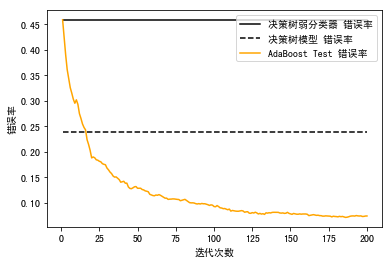

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss
# 设置 AdaBoost 迭代次数
n_estimators = 200
# 使用
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从 12000 个数据中取前 2000 行作为测试集，其余作为训练集
test_x ,test_y = X[2000:],y[2000:]
train_x,train_y = X[:2000],y[:2000]

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth =1,min_samples_leaf=1)
dt_stump.fit(train_x,train_y)
dt_stump_err = 1.0-dt_stump.score(test_x,test_y)

# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_err=1.0-dt.score(test_x,test_y)

# AdaBoost 分离器
ada = AdaBoostClassifier(base_estimator = dt_stump,n_estimators=n_estimators)
ada.fit(train_x,train_y)

# 三个分类器的错误可视化
flg = plt.figure()
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = flg.add_subplot(111)

ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label='决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--',label='决策树模型 错误率')
ada_err =np.zeros((n_estimators,))

# 遍历每次迭代的结果 i 为迭代次数， pred_y 为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
    # 统计错误率
    ada_err[i]=zero_one_loss(pred_y,test_y)
# 绘制每次迭代的 AdaBoost 错误率
ax.plot(np.arange(n_estimators)+1,ada_err,label='AdaBoost Test 错误率',color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()